# ♡ Trabalhando atributos ♡

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import path
import numpy as np

pd.__version__

'0.24.2'

In [2]:
def parseInt(value):
    if value == True:
        return 1
    elif value == False:
        return 0
    else:
        return pd.np.nan

# 1. Azure

In [44]:
dataframe = pd.read_excel('all_attributes.xlsx', usecols=range(0,29), sheet_name='azure')

In [45]:
#converte pra inteiro as colunas booleanas
bool_columns = list(filter(lambda x: x.startswith('A_' or 'E_' or 'V_'), dataframe.columns))
for col in bool_columns:
    dataframe[col] = dataframe[col].apply(parseInt)

In [40]:
dataframe.columns

Index(['FILENAME', 'IMAGE', 'GENDER', 'G_AZURE', 'A_GENDER_AZURE',
       'A_MALE_AZURE', 'E_MALE_AZURE', 'A_FEMALE_AZURE', 'E_FEMALE_AZURE',
       'MODA_AGE', 'AGE_MIN', 'AGE_MAX', 'AGE_AZURE', 'V_AGE_AZURE',
       'Attractive', 'Is this person famous?', 'Common?',
       'How much emotion is in this face?', 'Emotion?', 'Eyes direction?',
       'Face direction?', 'Facial hair?', 'Friendly', 'Makeup?',
       'Image quality', 'Race', 'Memorable',
       'At what speed do you think this expression is happening?',
       'How much teeth is showing?'],
      dtype='object')

### heatmap completo

In [ ]:
dataframe = dataframe.drop(['FILENAME', 'IMAGE', 'GENDER','E_MALE_AZURE', 
                            'E_FEMALE_AZURE', 'AGE_MIN', 'AGE_MAX'], axis = 1)

In [ ]:
graph = sns.pairplot(dataframe, height = 5, diag_kind = 'hist')

In [ ]:
fig = graph.get_figure()
fig.savefig("pairplot_completo_azure.pdf")

In [ ]:
dataframe = dataframe.drop(['FILENAME', 'IMAGE', 'GENDER', 'A_MALE_AZURE', 'E_MALE_AZURE', 
                            'A_FEMALE_AZURE', 'E_FEMALE_AZURE', 'AGE_MIN', 'AGE_MAX'], axis = 1)

In [ ]:
sns.set(style="white")
plt.figure(figsize=(50,30))
graph = sns.heatmap(dataframe.corr(), annot = True)

fig = graph.get_figure()
fig.savefig("heatmap_azure_completo.pdf")

### filtro: apenas genero feminino

In [41]:
lista_fem = []

for line in dataframe.index:
    
    if dataframe['GENDER'][line] == 0:
        lista_fem.append(line)

dataframe = dataframe.loc[lista_fem, :]

In [42]:
dataframe = dataframe.drop(['FILENAME', 'IMAGE', 'GENDER', 'A_MALE_AZURE', 'E_MALE_AZURE', 
                            'AGE_MIN', 'AGE_MAX'], axis = 1)

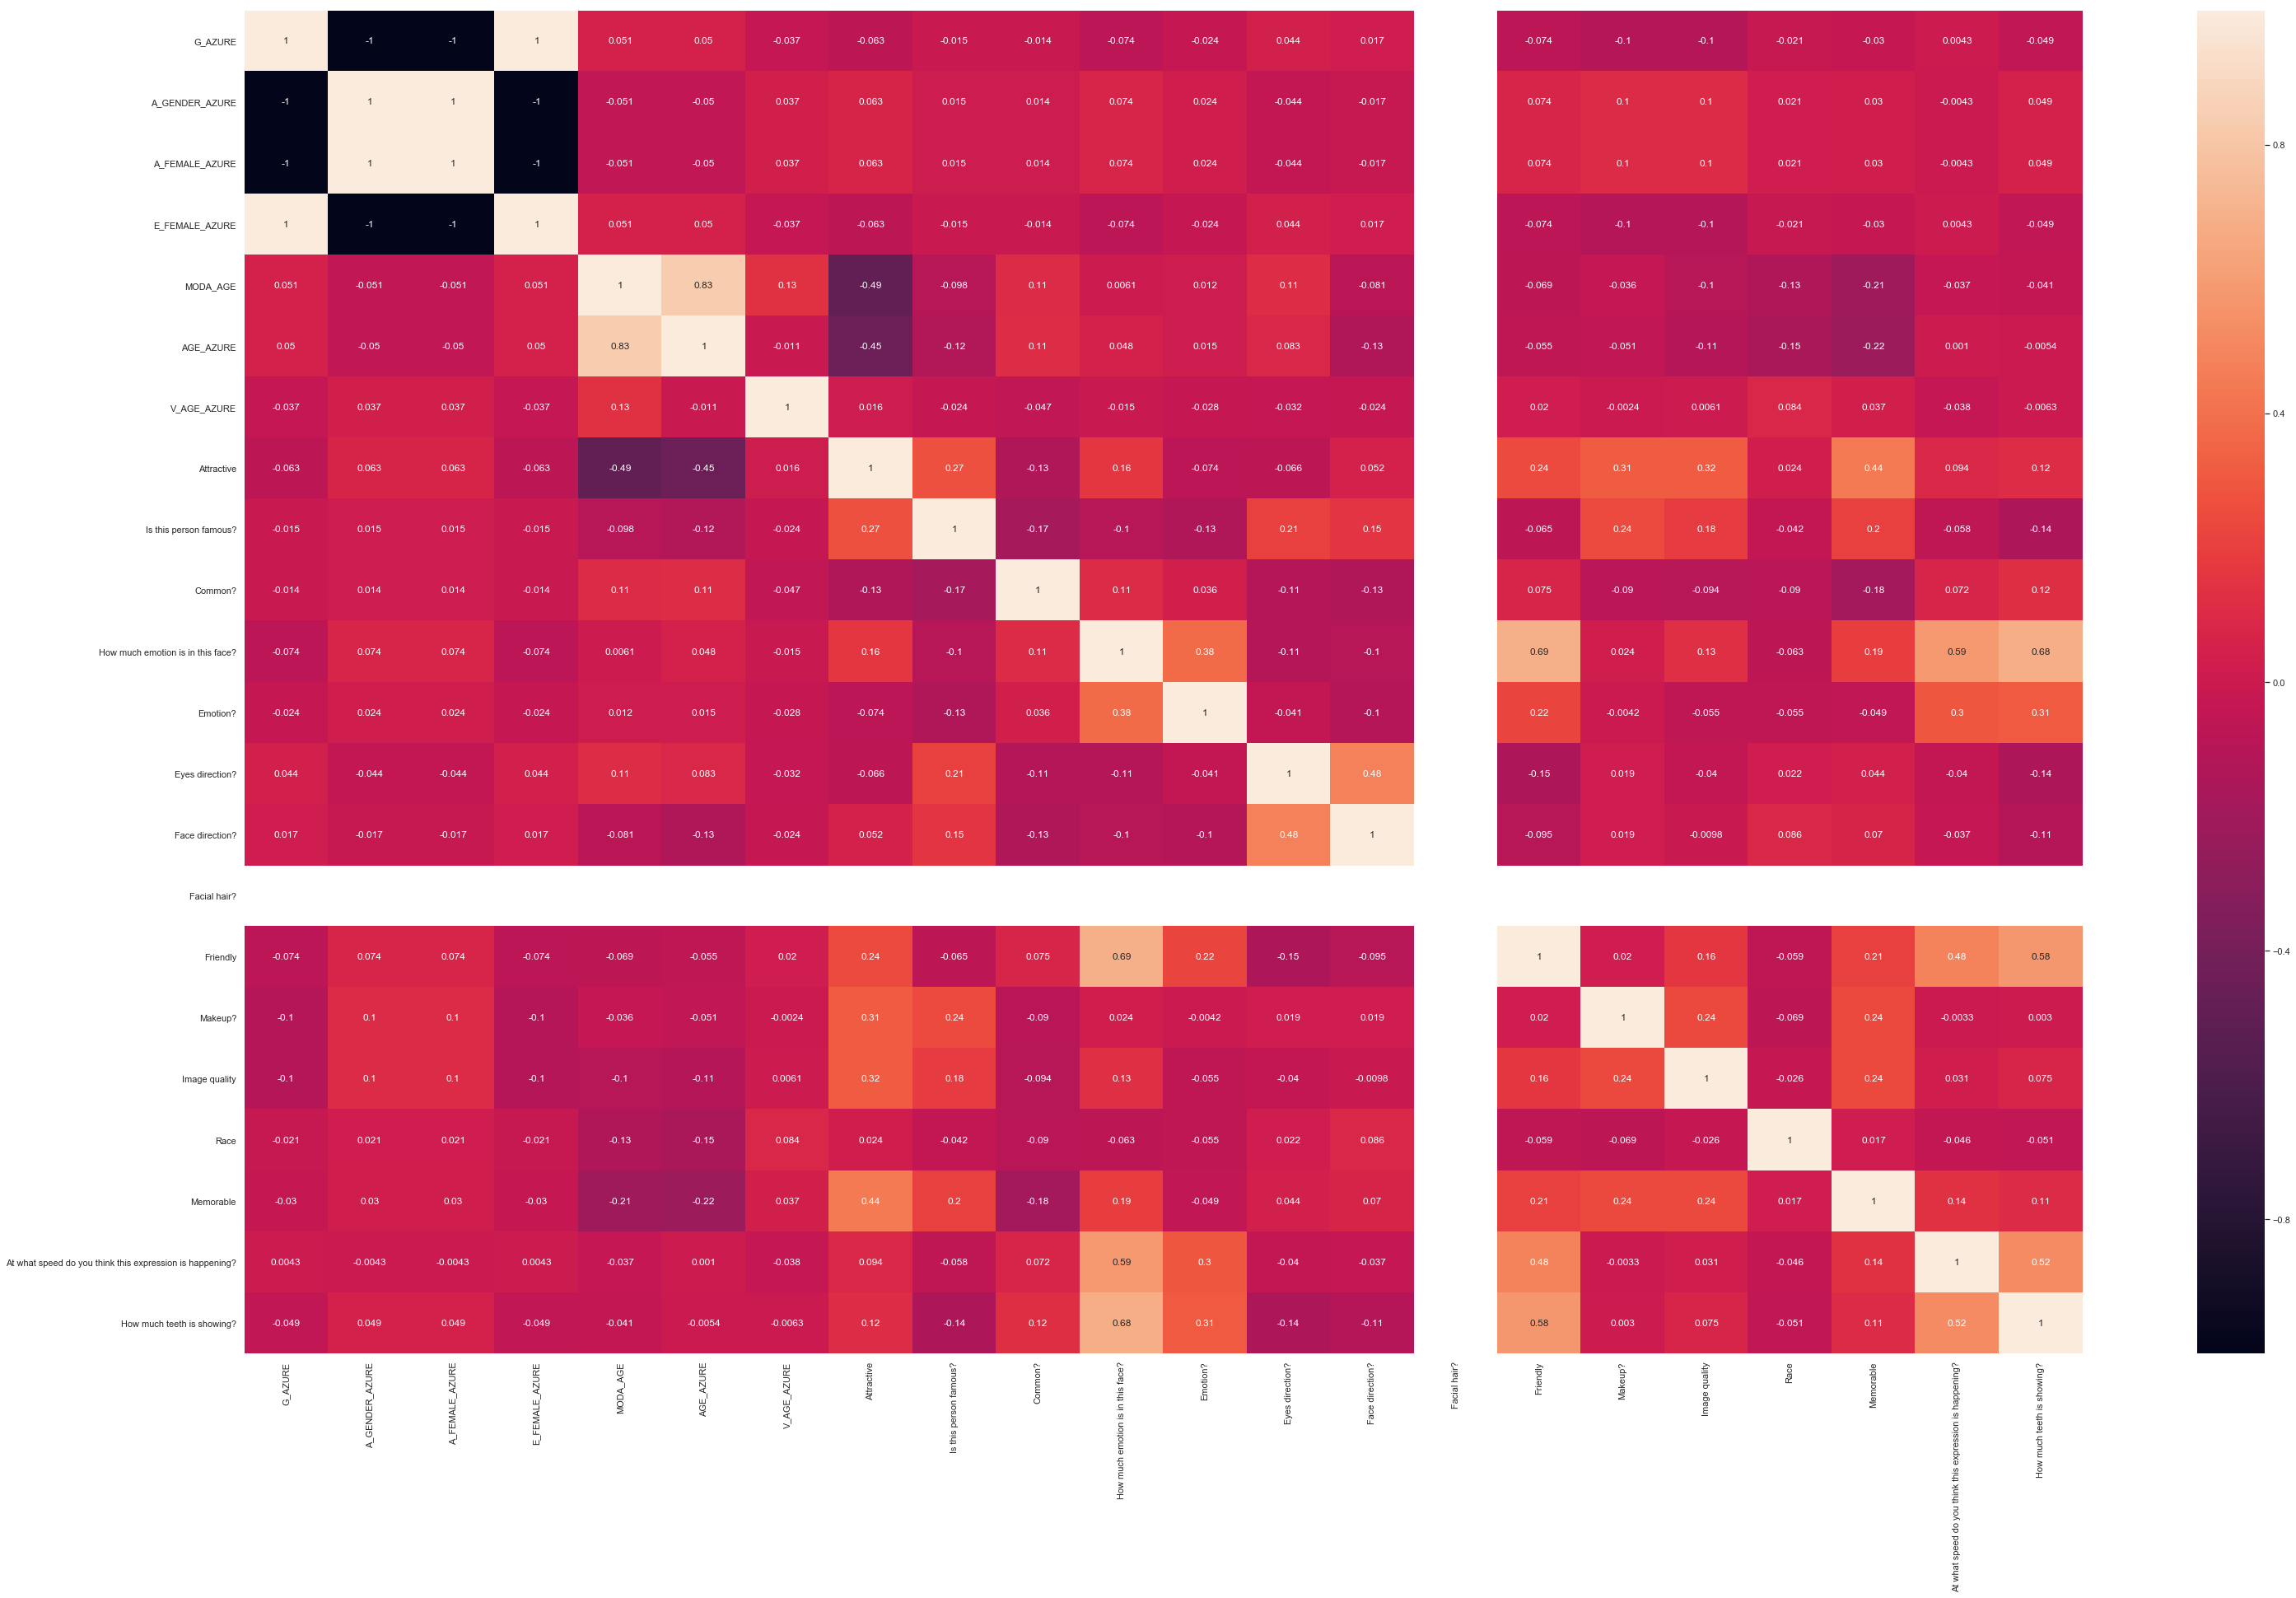

In [43]:
sns.set(style="white")
plt.figure(figsize=(50,30))
graph = sns.heatmap(dataframe.corr(), annot = True)

fig = graph.get_figure()
fig.savefig("heatmap_azure_fem.pdf")

### filtro: apenas genero masculino

In [46]:
lista_male = []

for line in dataframe.index:
    
    if dataframe['GENDER'][line] == 1:
        lista_male.append(line)

dataframe = dataframe.loc[lista_male, :]

In [47]:
dataframe = dataframe.drop(['FILENAME', 'IMAGE', 'GENDER', 'A_FEMALE_AZURE', 'E_FEMALE_AZURE', 
                            'AGE_MIN', 'AGE_MAX'], axis = 1)

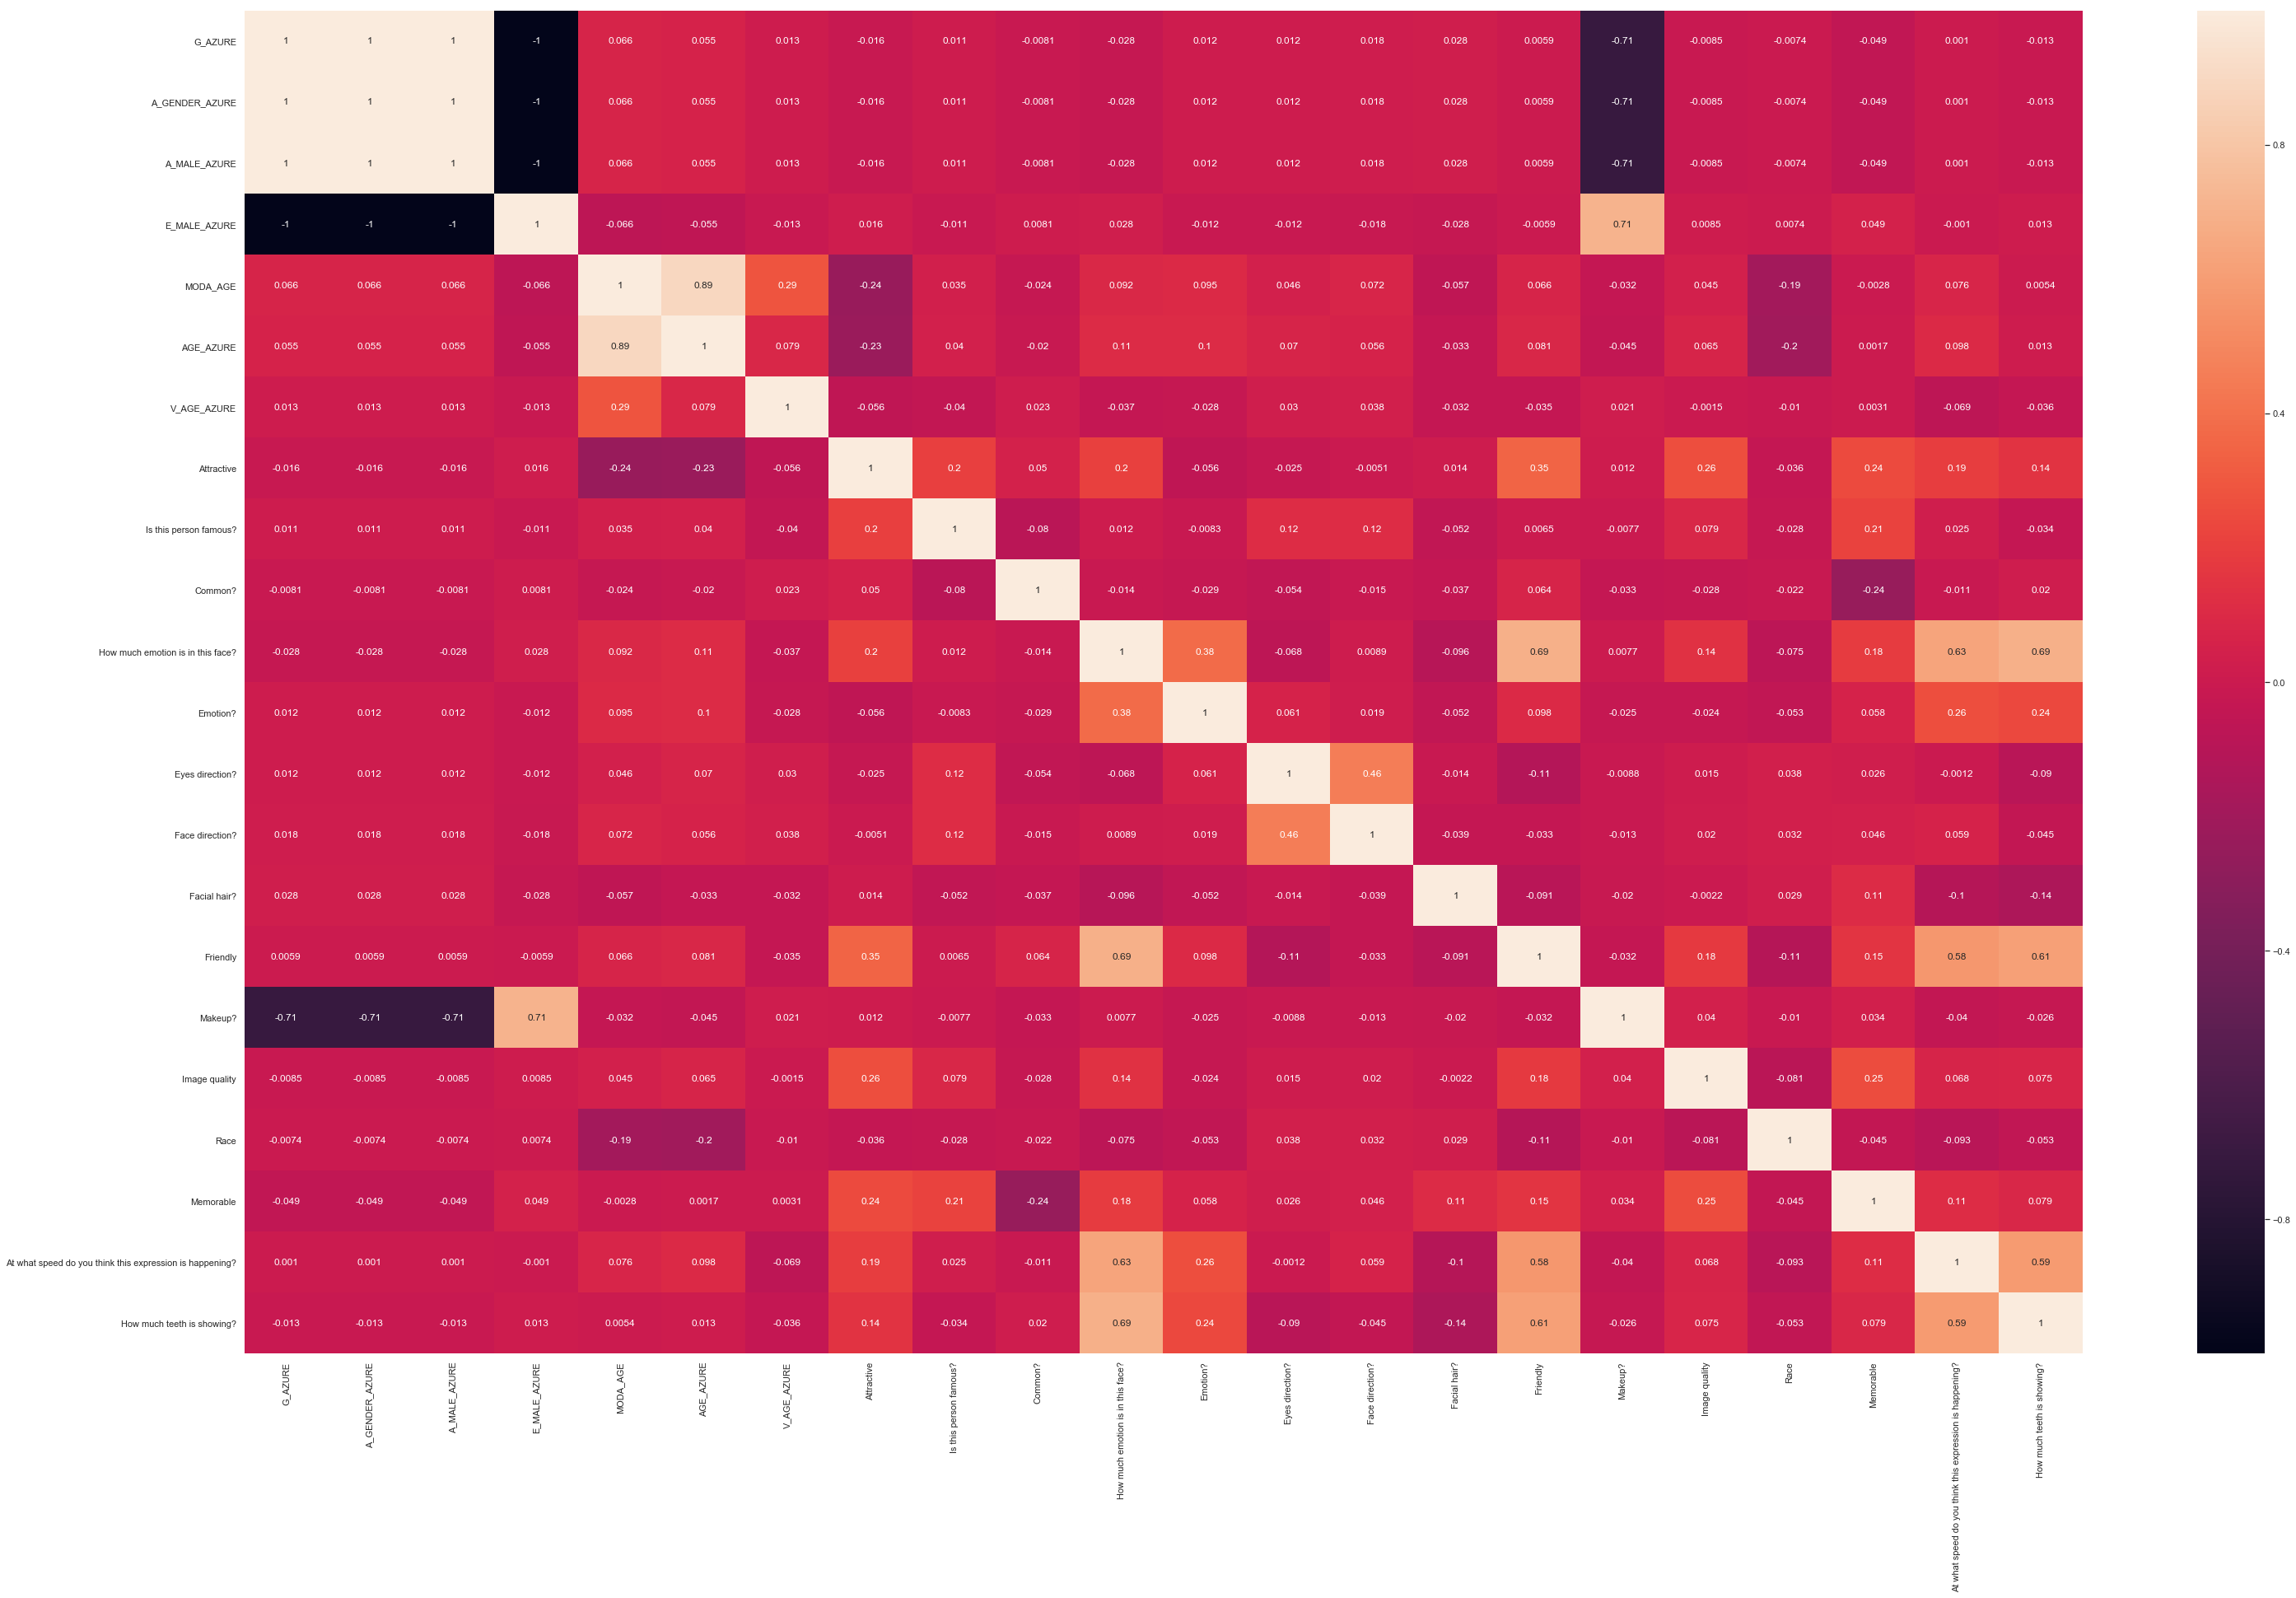

In [48]:
sns.set(style="white")
plt.figure(figsize=(50,30))
graph = sns.heatmap(dataframe.corr(), annot = True)

fig = graph.get_figure()
fig.savefig("heatmap_azure_male.pdf")

#### 1.1. Gênero

In [ ]:
#lista dados de imagens com acerto ou erro de gênero
gender_false_lines = []
gender_true_lines = []

for line in dataframe.index:
    if dataframe['A_GENDER_AZURE'][line] == 0:
        gender_false_lines.append(line)
        
    else:
        gender_true_lines.append(line)

In [ ]:
#atualiza dataframe para um sem erros de gênero
dataframe = dataframe.loc[gender_true_lines, :]

In [ ]:
#pairplot
graph = sns.pairplot(dataframe, vars = ['AGE_AZURE', 'Friendly'], height = 5)

In [ ]:
#heatmap
sns.set(style="white")
plt.figure(figsize=(50,30)) 
graph = sns.heatmap(dataframe.corr(), annot = True)

In [ ]:
fig = graph.get_figure()
fig.savefig("/home/lavinia/Área de Trabalho/heatmap_azure.pdf")

#### 1.2. Idade

In [ ]:
#lista dados de imagens com acerto ou erro de gênero
age_false_lines = []
age_true_lines = []

for line in dataframe.index:
    if dataframe['V_AGE_AZURE'][line] == 0:
        age_false_lines.append(line)
        
    else:
        age_true_lines.append(line)

In [ ]:
#atualiza dataframe para um sem erros de idade
dataframe = dataframe.loc[age_true_lines, :]

In [ ]:
#pairplots
graph = sns.pairplot(dataframe, vars = ['AGE_AZURE', 'Attractive'], height = 5)
graph = sns.pairplot(dataframe, vars = ['AGE_AZURE', 'Emotion?'], height = 5)
graph = sns.pairplot(dataframe, vars = ['AGE_AZURE', 'Eyes direction?'], height = 5)
graph = sns.pairplot(dataframe, vars = ['AGE_AZURE', 'Face direction?'], height = 5)
graph = sns.pairplot(dataframe, vars = ['AGE_AZURE', 'Facial hair?'], height = 5)
graph = sns.pairplot(dataframe, vars = ['AGE_AZURE', 'Friendly'], height = 5)
graph = sns.pairplot(dataframe, vars = ['AGE_AZURE', 'Makeup?'], height = 5)
graph = sns.pairplot(dataframe, vars = ['AGE_AZURE', 'Race'], height = 5)
graph = sns.pairplot(dataframe, vars = ['AGE_AZURE', 'How much teeth is showing?'], height = 5)

In [ ]:
#heatmap
sns.set(style="white")
plt.figure(figsize=(50,30))
graph = sns.heatmap(dataframe.corr(), annot = True)

In [ ]:
#salva imagem
fig = graph.get_figure()
fig.savefig("/home/lavinia/Área de Trabalho/heatmap_makeup_acertomulher.pdf")

### testes

In [ ]:
#a 'acerto' e e 'erro' para os generos
a_fem_gender = []
a_male_gender = []
e_fem_gender = []
e_male_gender = []

#a 'acerto' e e 'erro' para idade, considerando separaçao por genero aparente (nao usando resposta da API)
a_fem_age = []
e_fem_age = []
a_male_age = []
e_male_age = []

#lista todos homens ou todas mulheres
lista_fem = []
lista_male = []

In [ ]:
for line in dataframe.index:
    
    if dataframe['GENDER'][line] == 0:
        lista_fem.append(line)
        if dataframe['V_AGE_AZURE'][line] == 0:
            e_fem_age.append(line)
        else:
            a_fem_age.append(line)
    
    elif dataframe['GENDER'][line] == 1:
        lista_male.append(line)
        if dataframe['V_AGE_AZURE'][line] == 0:
            e_male_age.append(line)
        else:
            a_male_age.append(line)
    
    
    if dataframe['A_FEMALE_AZURE'][line] == 1:
        a_fem_gender.append(line)
    
    elif dataframe['E_FEMALE_AZURE'][line] == 1:
        e_fem_gender.append(line)
        
    
    if dataframe['A_MALE_AZURE'][line] == 1:
        a_male_gender.append(line)
    
    elif dataframe['E_MALE_AZURE'][line] == 1:
        e_male_gender.append(line)    


In [ ]:
dataframe = dataframe.loc[lista_fem, :]
sns.countplot(dataframe['MODA_AGE'])

In [ ]:
dataframe = dataframe.loc[a_fem_age, :]
sns.countplot(dataframe['MODA_AGE'])

In [ ]:
dataframe = dataframe.loc[e_fem_age, :]
sns.countplot(dataframe['MODA_AGE'])

# 2. Rekognition

In [62]:
dataframe = pd.read_excel('all_attributes.xlsx', usecols=range(0,29), sheet_name='rekognition')

In [63]:
#converte pra inteiro as colunas booleanas
bool_columns = list(filter(lambda x: x.startswith('A_' or 'E_' or 'V_'), dataframe.columns))
for col in bool_columns:
    dataframe[col] = dataframe[col].apply(parseInt)

In [51]:
dataframe.columns

Index(['FILENAME', 'IMAGE', 'GENDER', 'G_AWS', 'A_GENDER_AWS', 'A_MALE_AWS',
       'E_MALE_AWS', 'A_FEMALE_AWS', 'E_FEMALE_AWS', 'MODA_AGE', 'AGE_MIN',
       'AGE_MAX', 'AGE_MIN_AWS', 'V_MIN_AWS', 'AGE_MAX_AWS', 'V_MAX_AWS',
       'Attractive', 'Is this person famous?', 'Common?',
       'How much emotion is in this face?', 'Emotion?', 'Eyes direction?',
       'Face direction?', 'Facial hair?', 'Friendly', 'Makeup?',
       'Image quality', 'Race', 'Memorable'],
      dtype='object')

### heatmap completo

In [53]:
dataframe = dataframe.drop(['FILENAME', 'IMAGE', 'GENDER', 'A_MALE_AWS',
       'E_MALE_AWS', 'A_FEMALE_AWS', 'E_FEMALE_AWS','AGE_MIN',
       'AGE_MAX'], axis = 1)

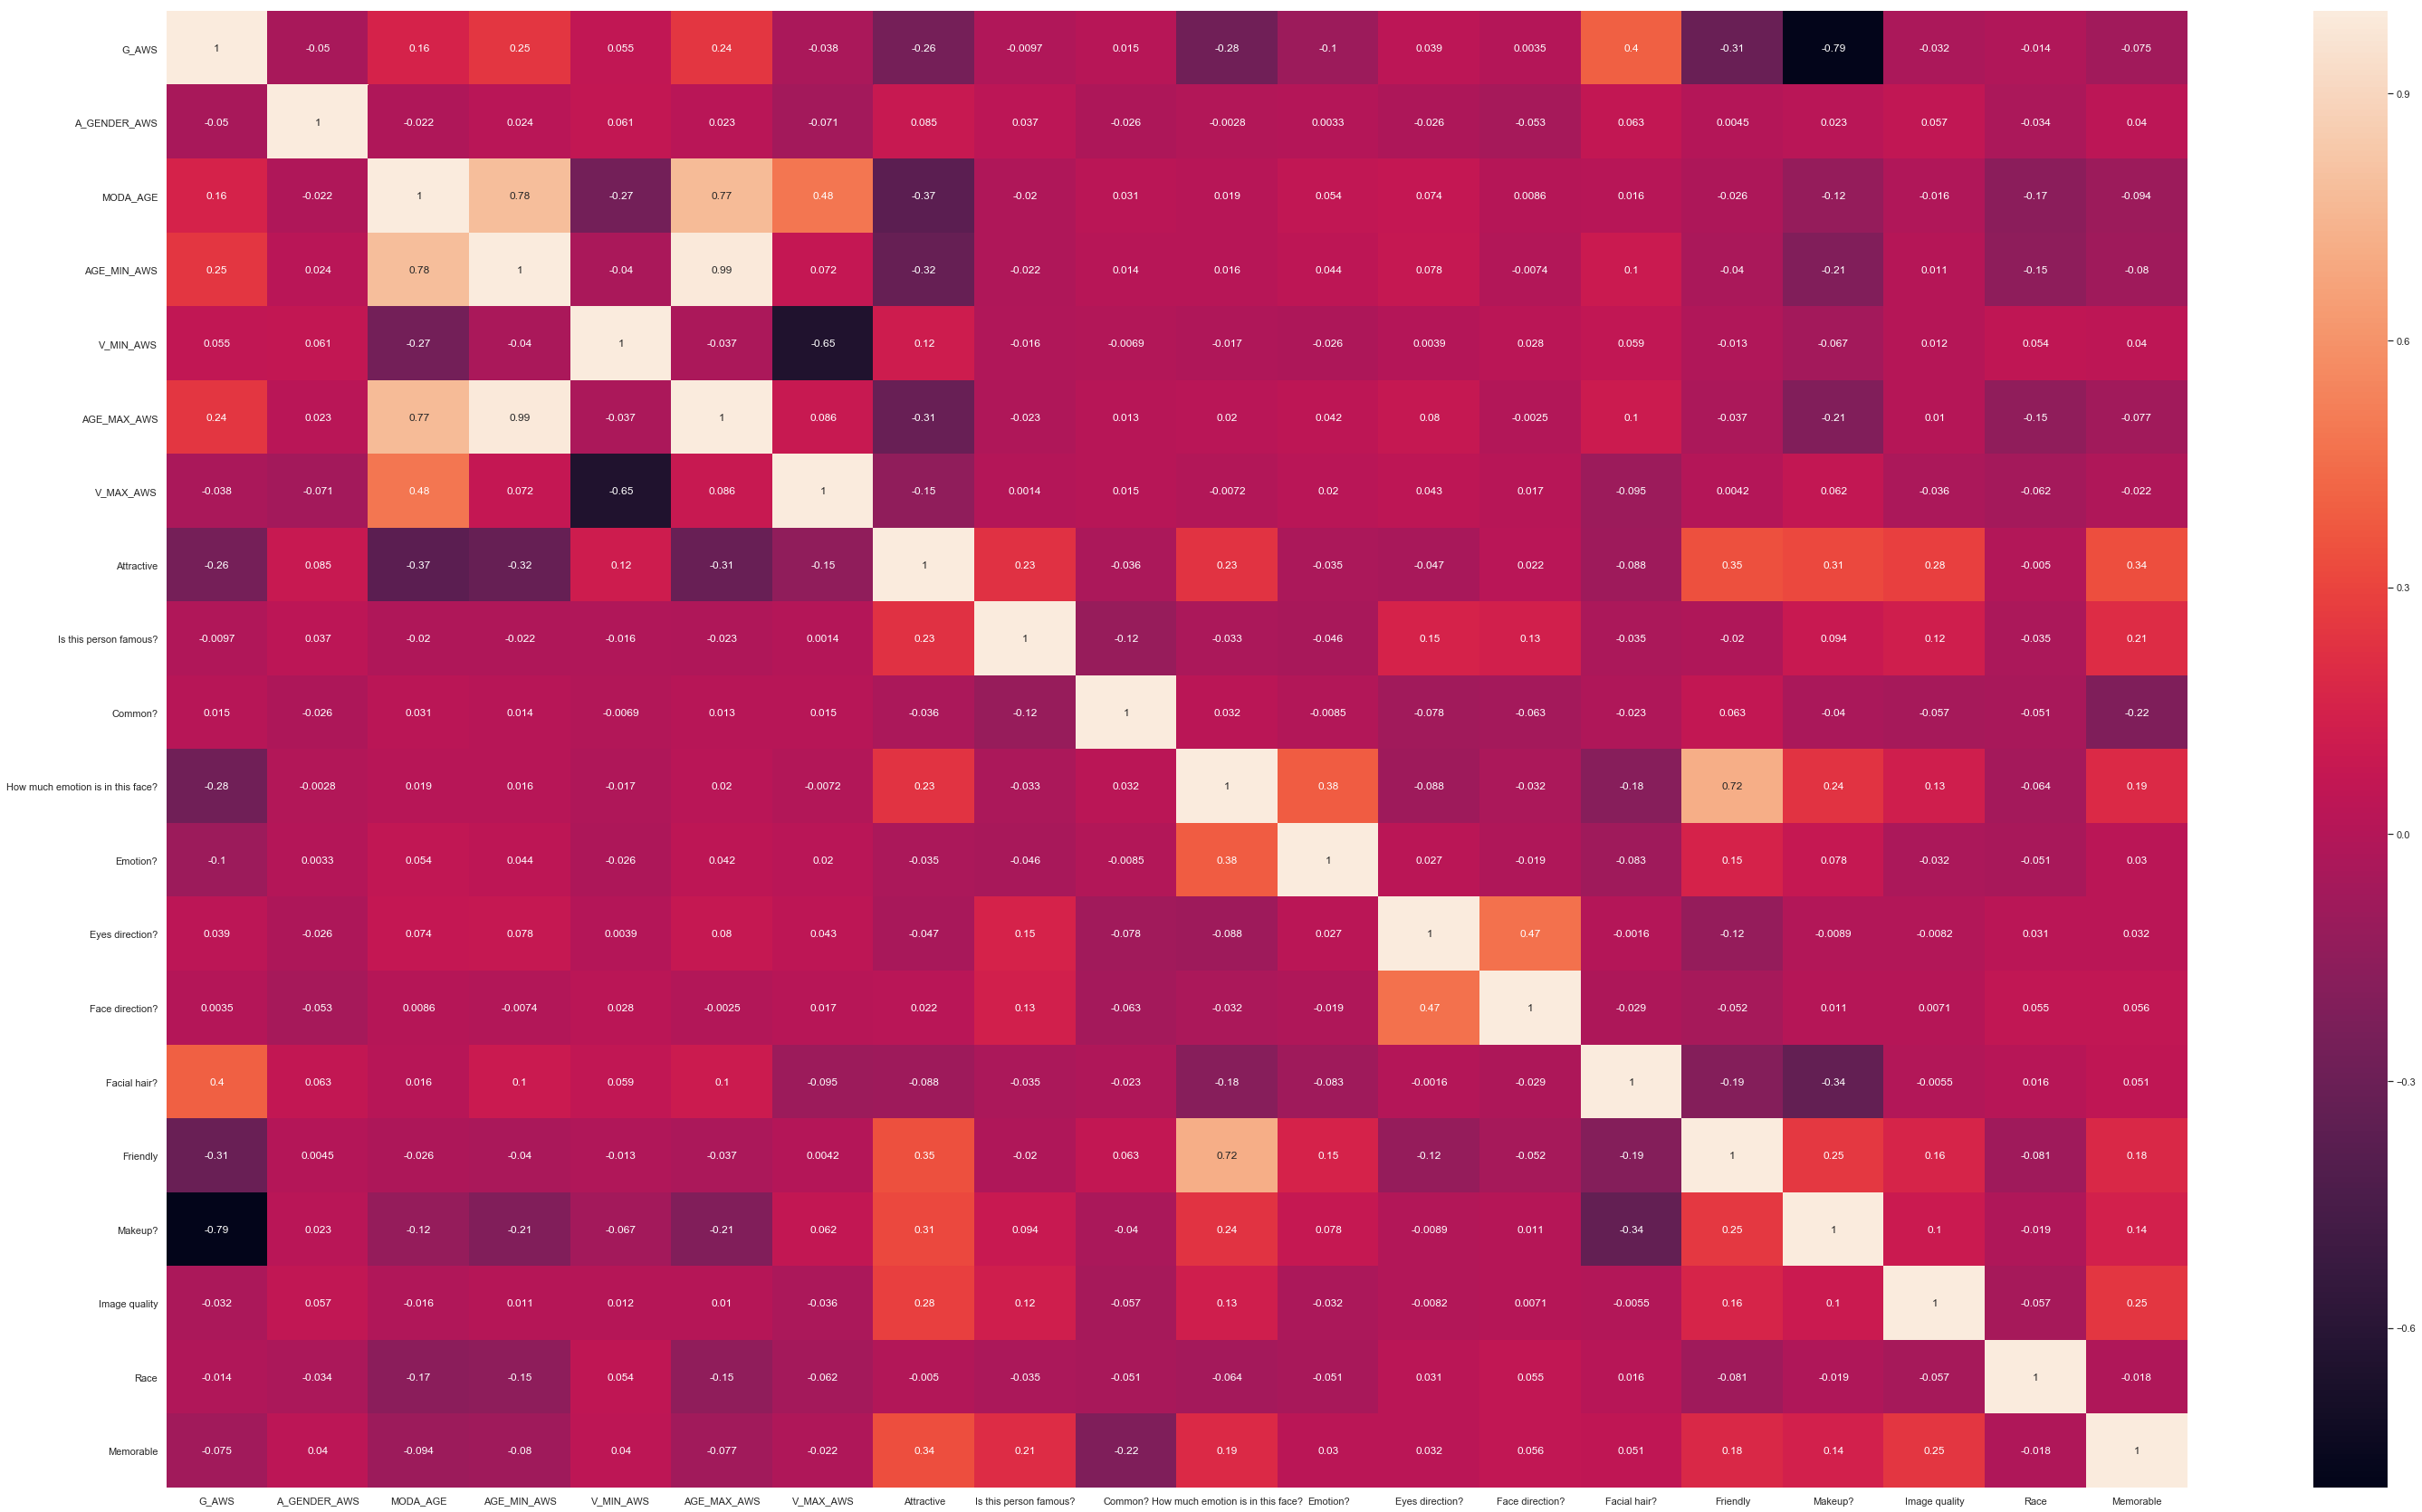

In [54]:
sns.set(style="white")
plt.figure(figsize=(50,30))
graph = sns.heatmap(dataframe.corr(), annot = True)

fig = graph.get_figure()
fig.savefig("heatmap_rekognition_completo.pdf")

### filtro: apenas genero feminino

In [59]:
lista_fem = []

for line in dataframe.index:
    
    if dataframe['GENDER'][line] == 0:
        lista_fem.append(line)

dataframe = dataframe.loc[lista_fem, :]

In [60]:
dataframe = dataframe.drop(['FILENAME', 'IMAGE', 'GENDER', 'A_MALE_AWS', 'E_MALE_AWS', 
                            'AGE_MIN', 'AGE_MAX'], axis = 1)

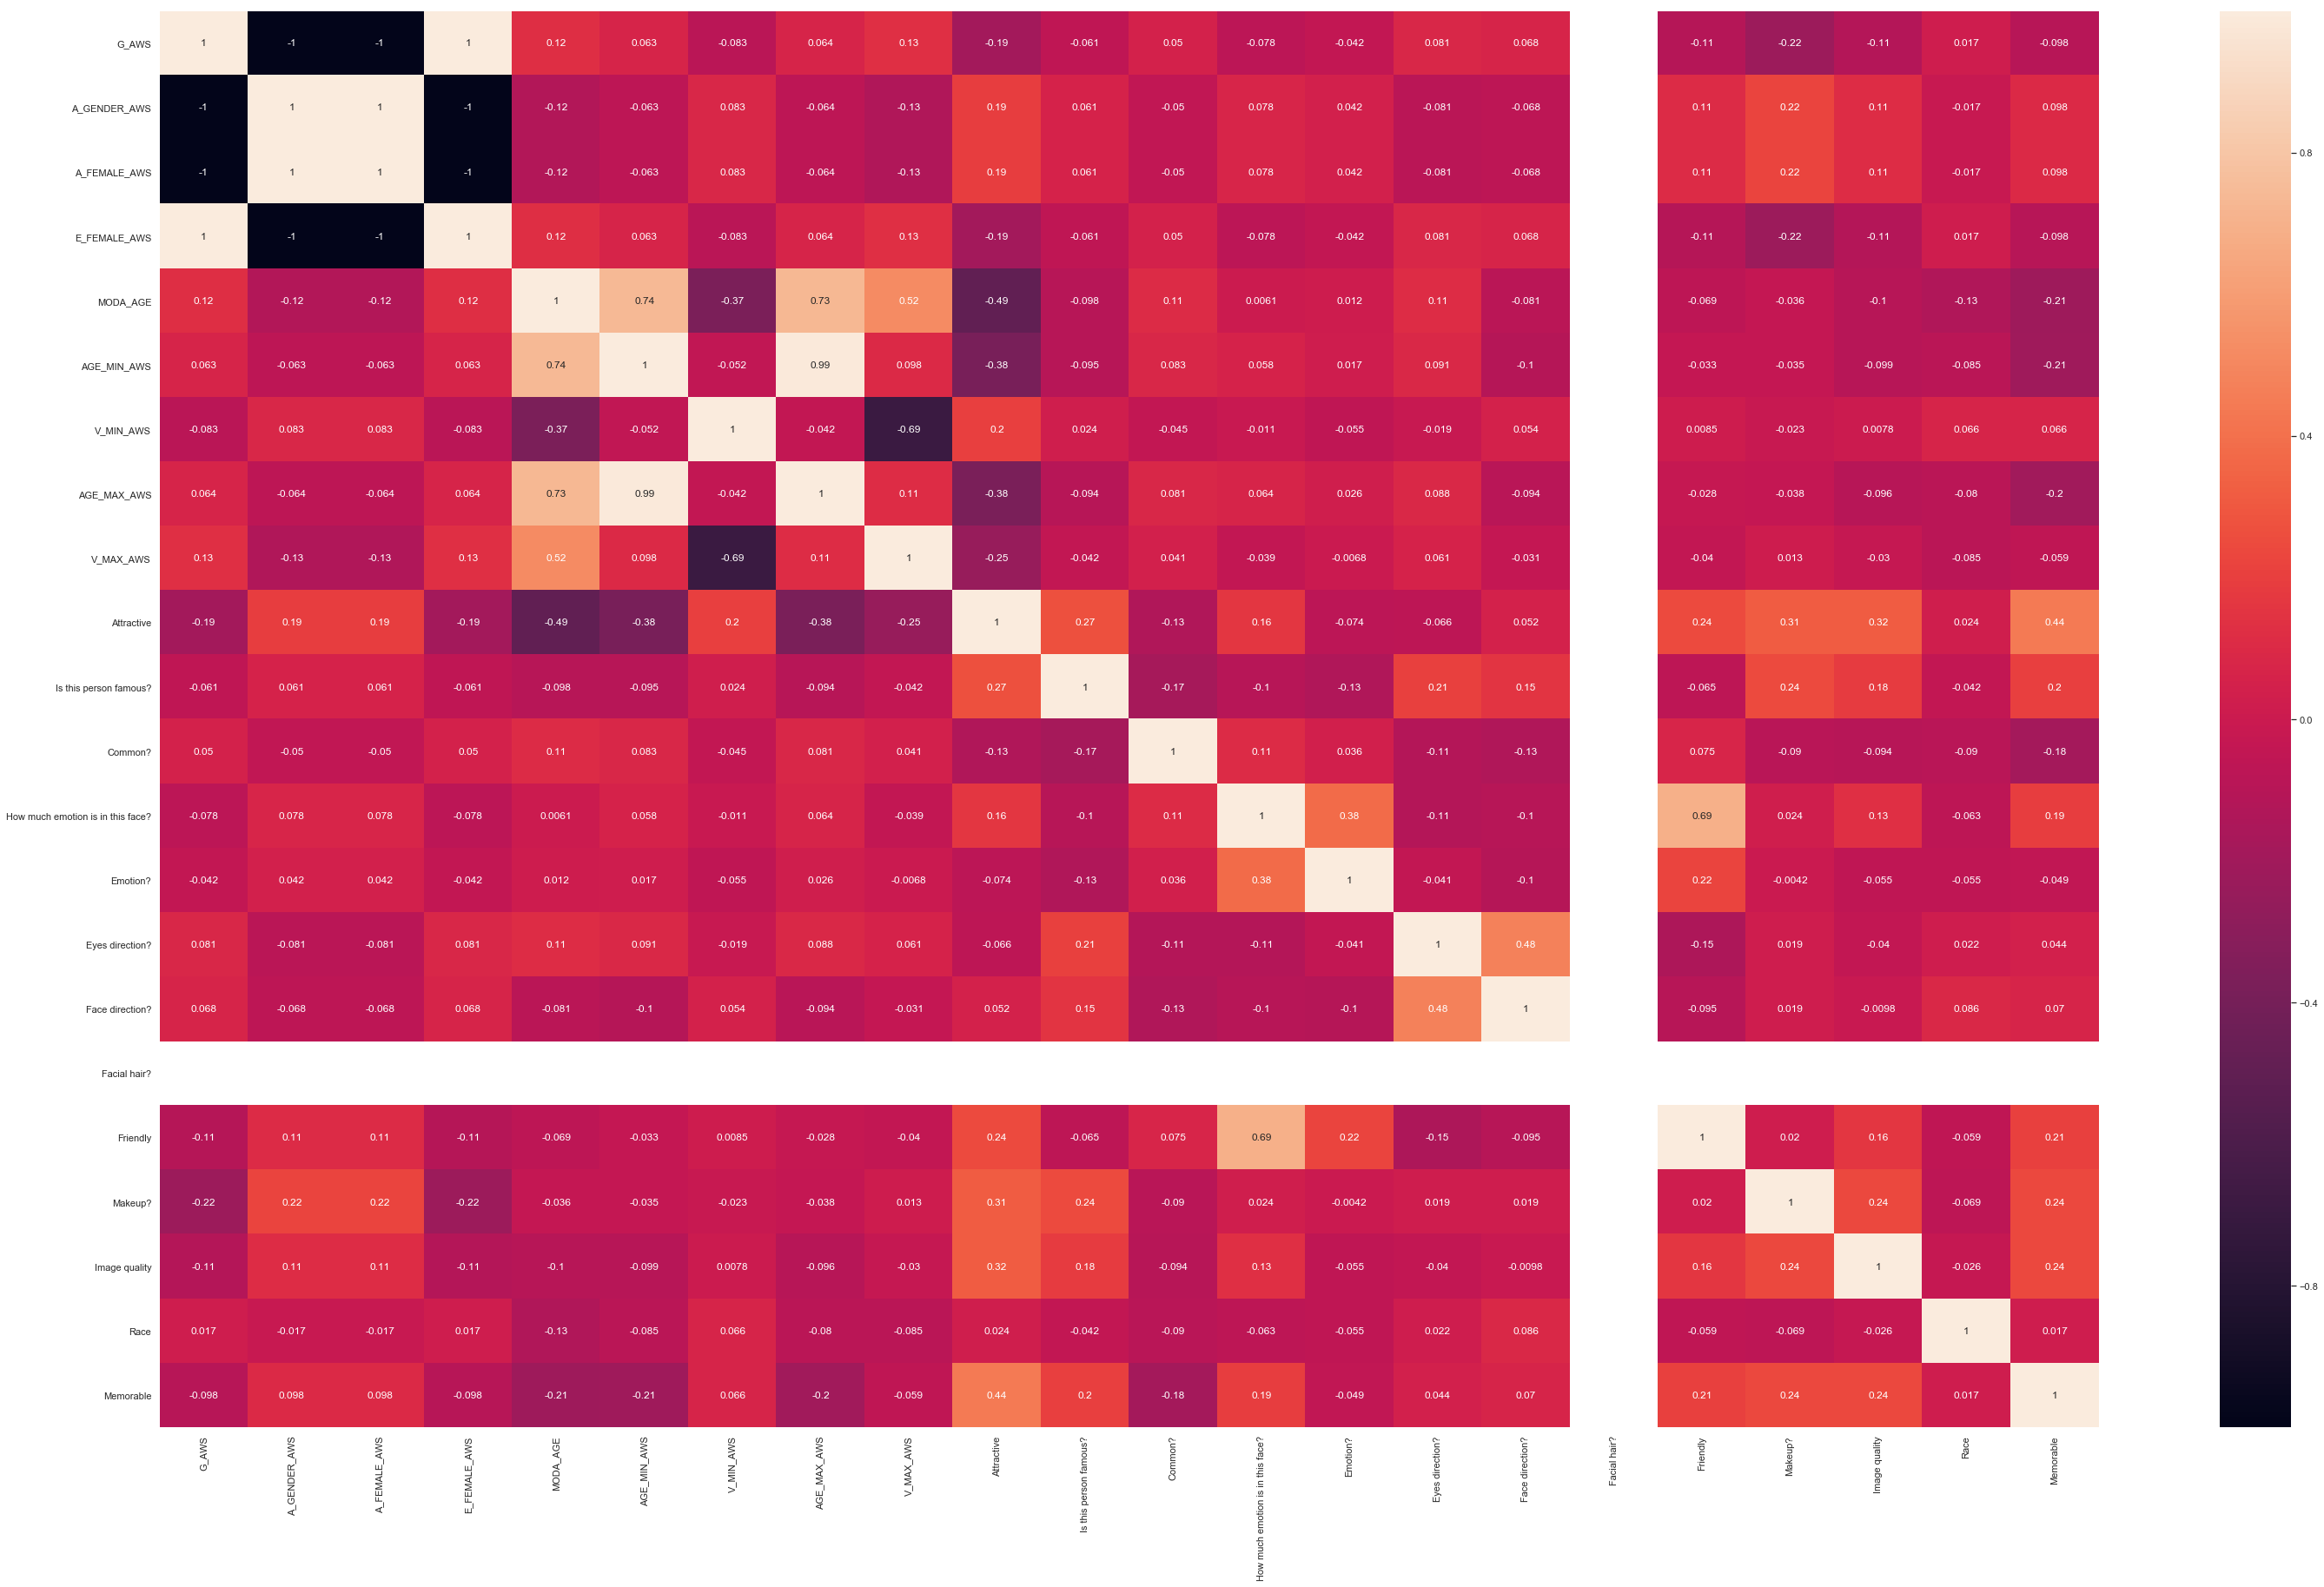

In [61]:
sns.set(style="white")
plt.figure(figsize=(50,30))
graph = sns.heatmap(dataframe.corr(), annot = True)

fig = graph.get_figure()
fig.savefig("heatmap_rekognition_female.pdf")

### filtro: apenas genero masculino

In [64]:
lista_male = []

for line in dataframe.index:
    
    if dataframe['GENDER'][line] == 1:
        lista_male.append(line)

dataframe = dataframe.loc[lista_male, :]

In [65]:
dataframe = dataframe.drop(['FILENAME', 'IMAGE', 'GENDER', 'A_FEMALE_AWS', 'E_FEMALE_AWS', 
                            'AGE_MIN', 'AGE_MAX'], axis = 1)

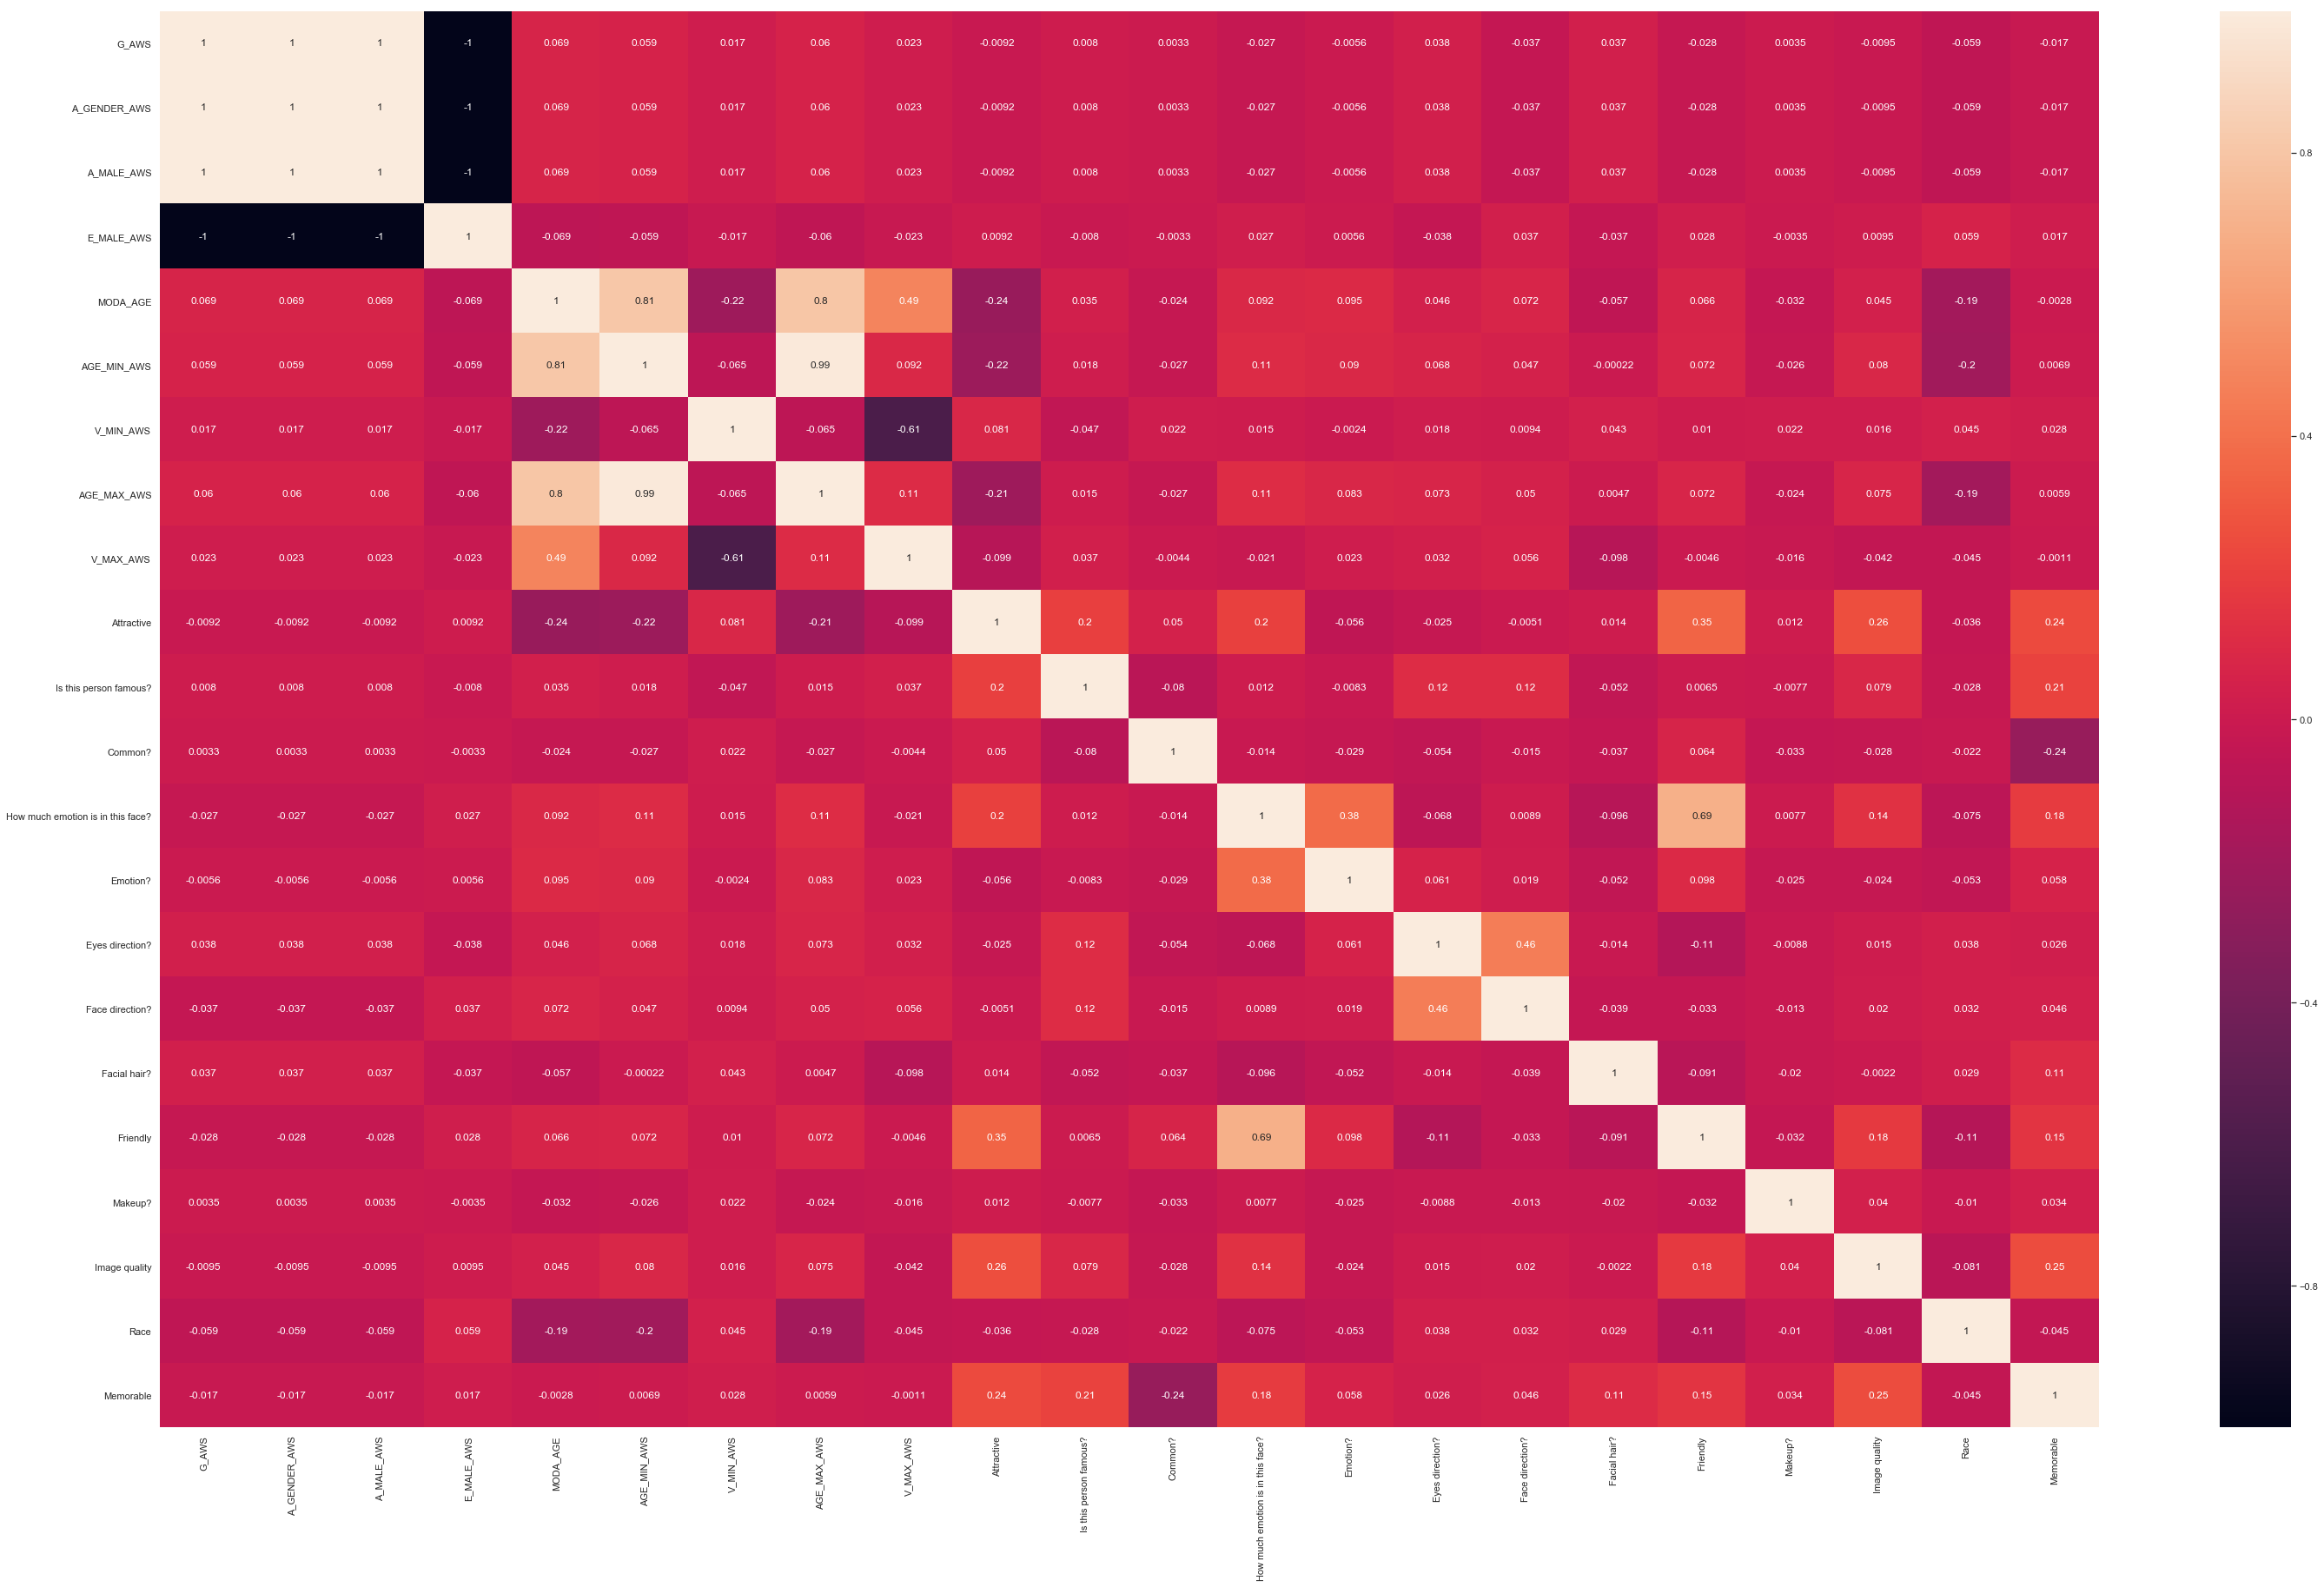

In [66]:
sns.set(style="white")
plt.figure(figsize=(50,30))
graph = sns.heatmap(dataframe.corr(), annot = True)

fig = graph.get_figure()
fig.savefig("heatmap_rekonition_male.pdf")

# 3. Watson

In [77]:
dataframe = pd.read_excel('all_attributes.xlsx', usecols=range(0,29), sheet_name='watson')

In [78]:
#converte pra inteiro as colunas booleanas
bool_columns = list(filter(lambda x: x.startswith('A_' or 'E_' or 'V_'), dataframe.columns))
for col in bool_columns:
    dataframe[col] = dataframe[col].apply(parseInt)

In [69]:
dataframe.columns

Index(['FILENAME', 'IMAGE', 'GENDER', 'G_WAT', 'A_GENDER_WAT', 'A_MALE_WAT',
       'E_MALE_WAT', 'A_FEMALE_WAT', 'E_FEMALE_WAT', 'MODA_AGE', 'AGE_MIN',
       'AGE_MAX', 'AGE_MIN_WATSON', 'V_MIN_WATSON', 'AGE_MAX_WATSON',
       'V_MAX_WATSON', 'Attractive', 'Is this person famous?', 'Common?',
       'How much emotion is in this face?', 'Emotion?', 'Eyes direction?',
       'Face direction?', 'Facial hair?', 'Friendly', 'Makeup?',
       'Image quality', 'Race', 'Memorable'],
      dtype='object')

### heatmap completo

In [70]:
dataframe = dataframe.drop(['FILENAME', 'IMAGE', 'GENDER', 'A_MALE_WAT',
       'E_MALE_WAT', 'A_FEMALE_WAT', 'E_FEMALE_WAT','AGE_MIN',
       'AGE_MAX'], axis = 1)

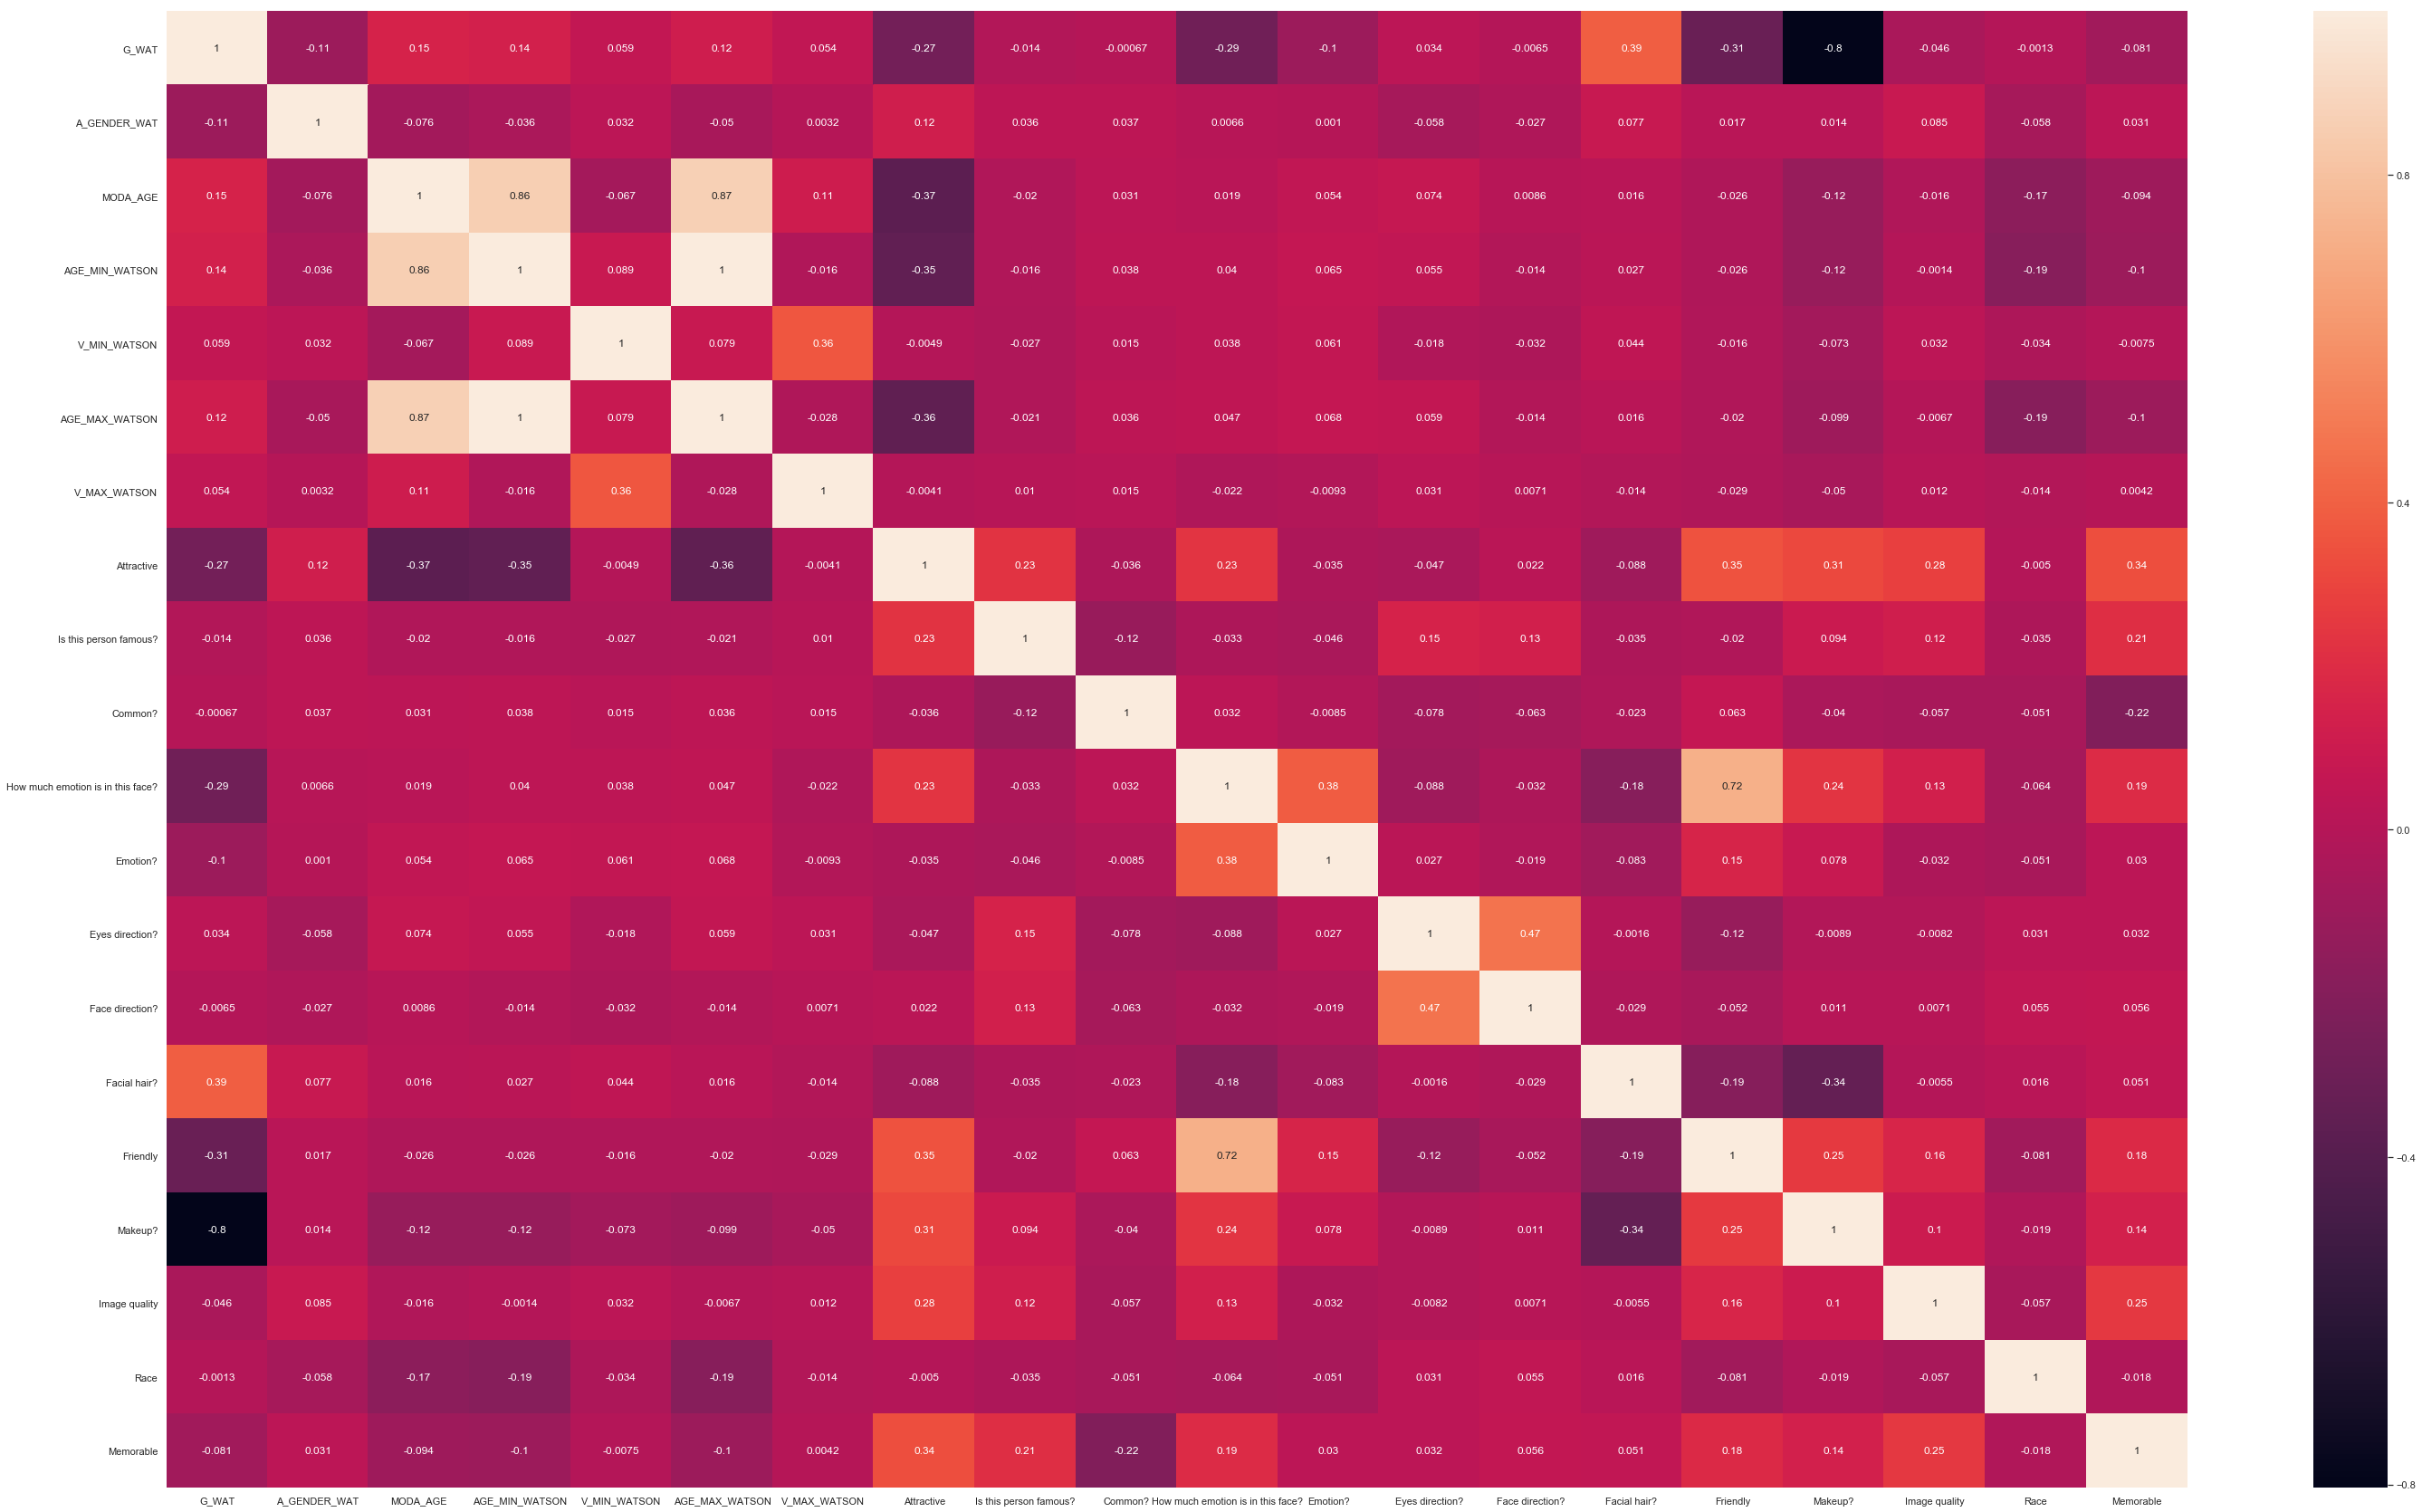

In [71]:
sns.set(style="white")
plt.figure(figsize=(50,30))
graph = sns.heatmap(dataframe.corr(), annot = True)

fig = graph.get_figure()
fig.savefig("heatmap_watson_completo.pdf")

### filtro: apenas genero feminino

In [74]:
lista_fem = []

for line in dataframe.index:
    
    if dataframe['GENDER'][line] == 0:
        lista_fem.append(line)

dataframe = dataframe.loc[lista_fem, :]

In [75]:
dataframe = dataframe.drop(['FILENAME', 'IMAGE', 'GENDER', 'A_MALE_WAT', 'E_MALE_WAT', 
                            'AGE_MIN', 'AGE_MAX'], axis = 1)

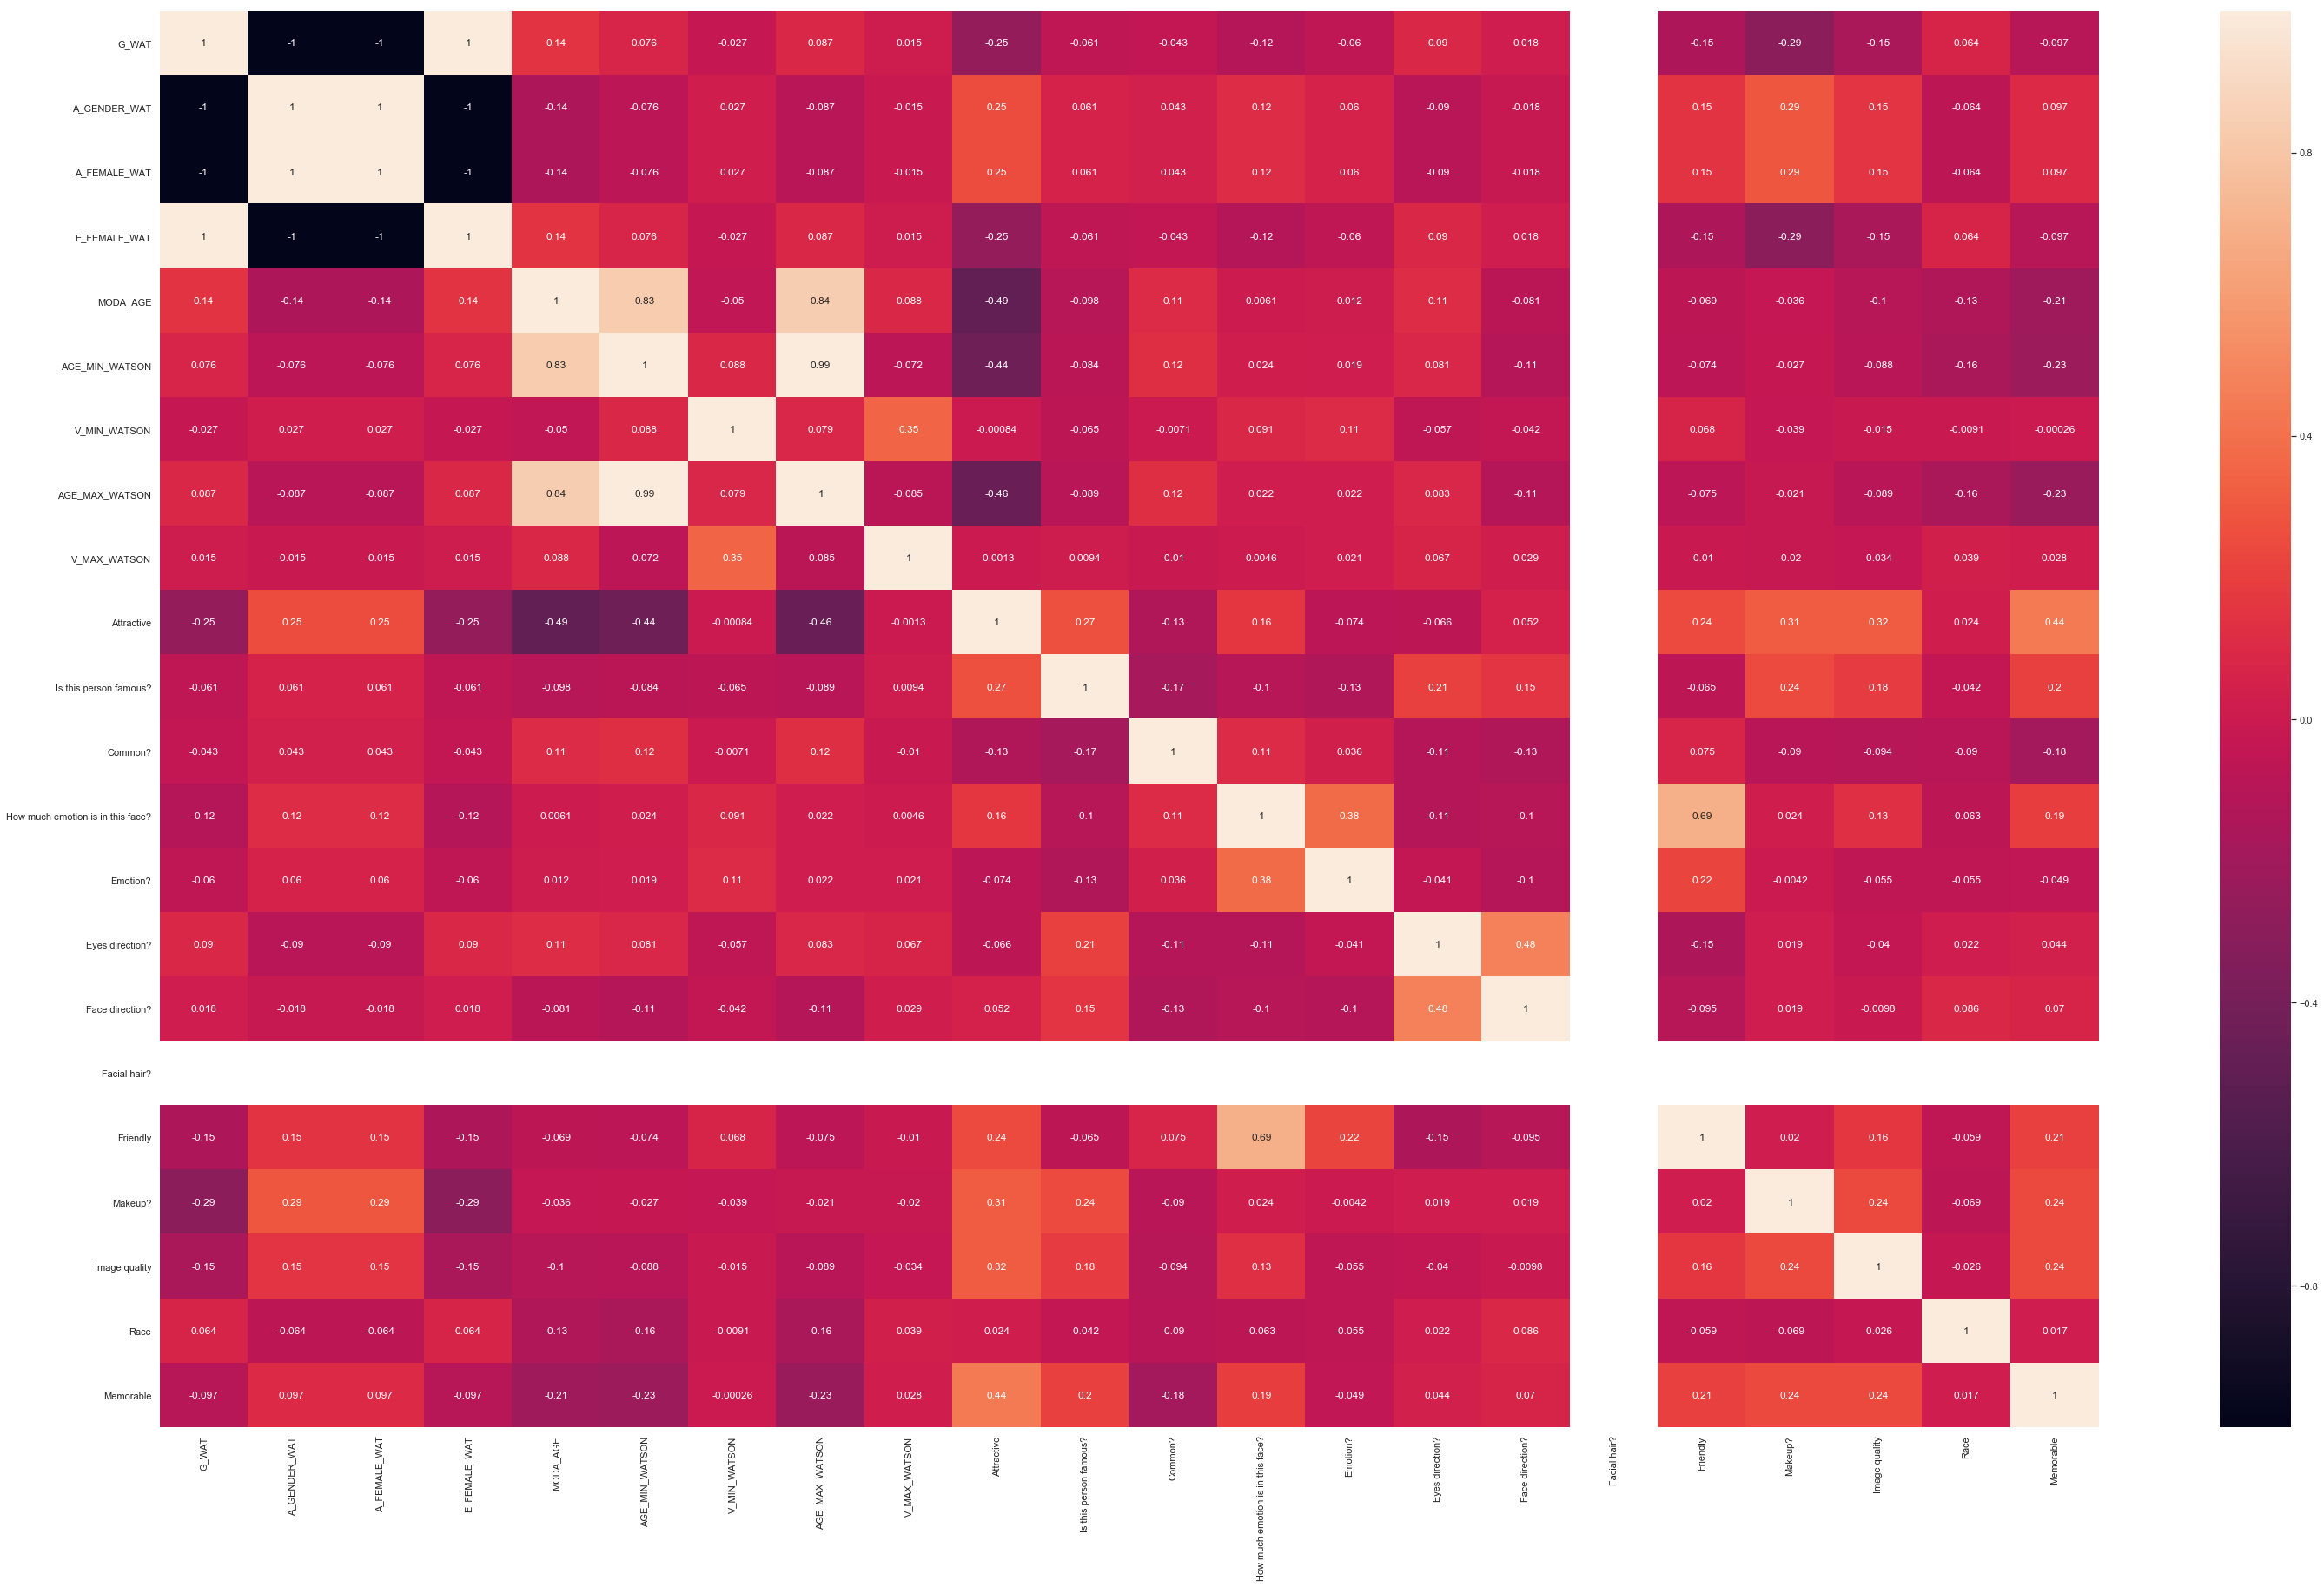

In [76]:
sns.set(style="white")
plt.figure(figsize=(50,30))
graph = sns.heatmap(dataframe.corr(), annot = True)

fig = graph.get_figure()
fig.savefig("heatmap_watson_female.pdf")

### filtro: apenas genero masculino

In [79]:
lista_male = []

for line in dataframe.index:
    
    if dataframe['GENDER'][line] == 1:
        lista_male.append(line)

dataframe = dataframe.loc[lista_male, :]

In [80]:
dataframe = dataframe.drop(['FILENAME', 'IMAGE', 'GENDER', 'A_FEMALE_WAT', 'E_FEMALE_WAT', 
                            'AGE_MIN', 'AGE_MAX'], axis = 1)

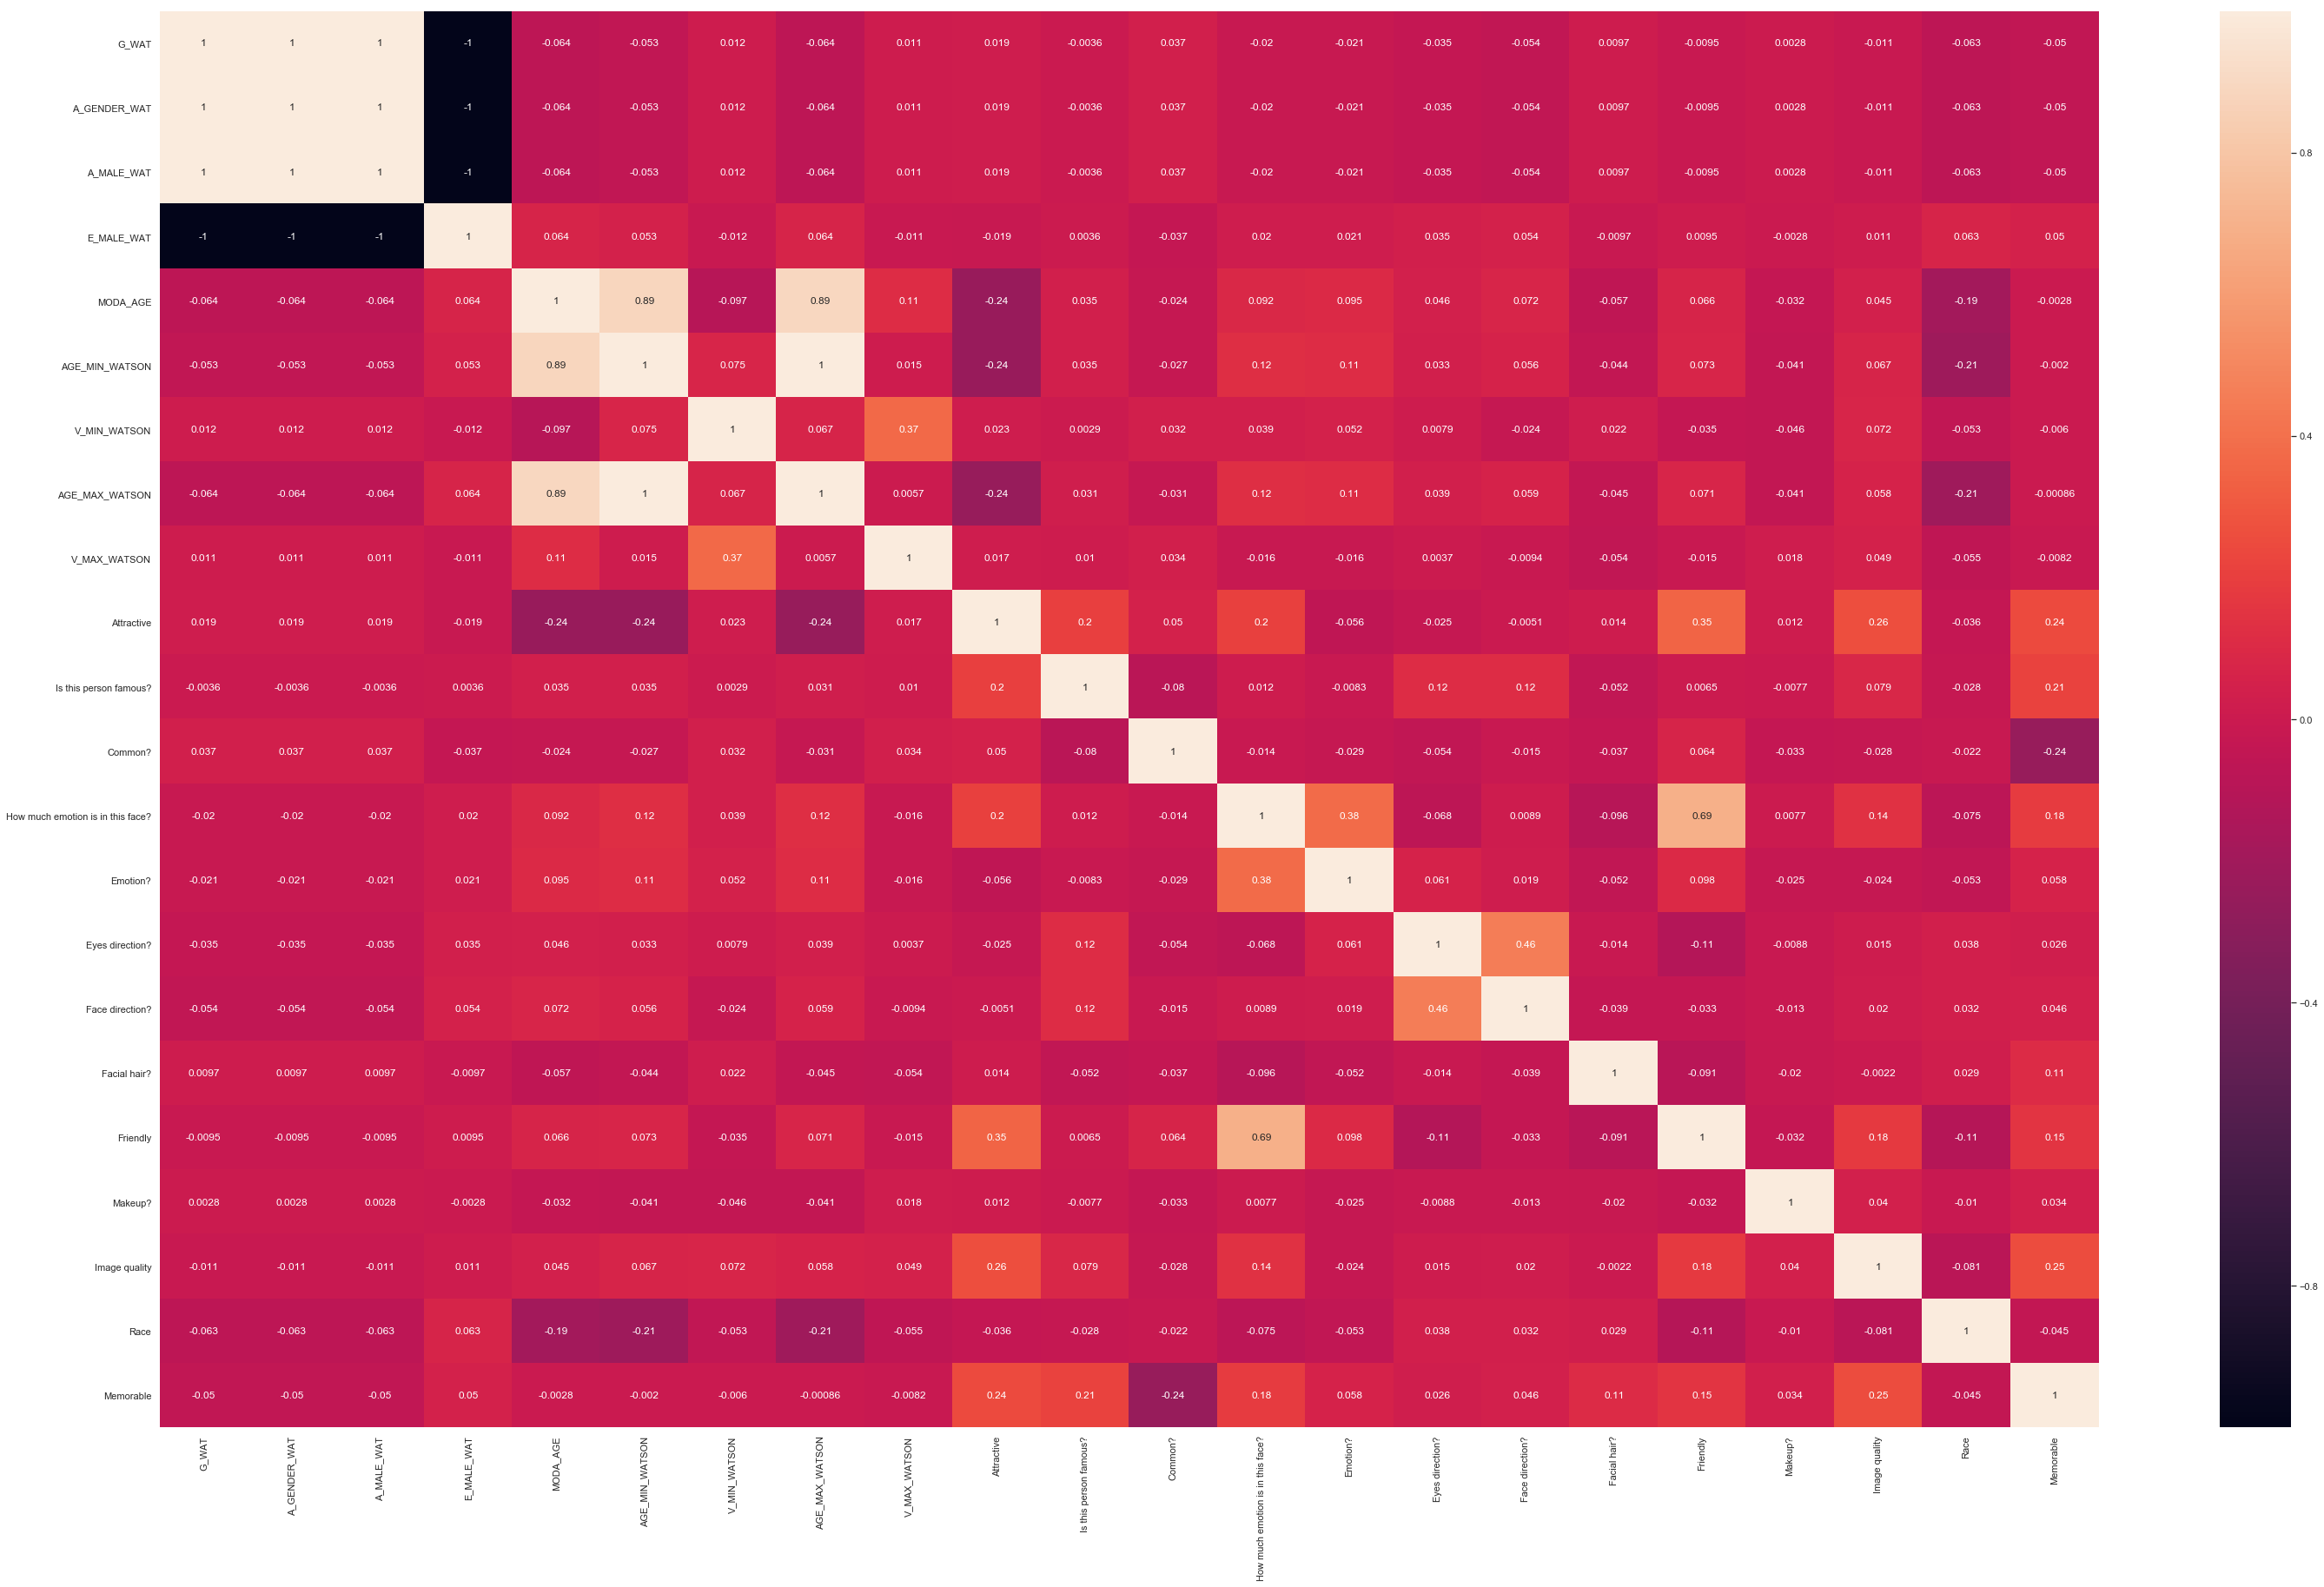

In [81]:
sns.set(style="white")
plt.figure(figsize=(50,30))
graph = sns.heatmap(dataframe.corr(), annot = True)

fig = graph.get_figure()
fig.savefig("heatmap_watson_male.pdf")